In [1]:
from sklearn.externals import joblib
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
from datetime import date

#### load data

In [2]:
# Load Train Data
submittion = pd.read_csv('../data/raw/submittion.csv',sep=';')

In [3]:
submittion.shape

(12897, 35)

In [4]:
predictors = ['id_pos', 'canal', 'competidores',
       'ingreso_mediana', 'densidad_poblacional',
       'pct_0a5', 'pct_5a9', 'pct_10a14', 'pct_15a19', 'pct_20a24',
       'pct_25a29', 'pct_30a34', 'pct_35a39', 'pct_40a44', 'pct_45a49',
       'pct_50a54', 'pct_55a59', 'pct_60a64', 'pct_65a69', 'pct_70a74',
       'pct_75a79', 'pct_80a84', 'pct_85ainf', 'pct_bachelors',
       'pct_doctorados', 'pct_secundario', 'pct_master', 'pct_bicicleta',
       'pct_omnibus', 'pct_subtes', 'pct_taxi', 'pct_caminata',
       'mediana_valor_hogar']

In [5]:
submittion = submittion[predictors]

In [6]:
# fill Nans
for c in submittion.columns[submittion.dtypes != 'object']:
    submittion[c].fillna(submittion[c].median(), inplace=True)

In [7]:
for c in submittion.columns[submittion.dtypes == 'object']:
    submittion[c].fillna(submittion['canal'].mode()[0], inplace=True)

In [8]:
# Label encoder
for c in submittion.columns[submittion.dtypes == 'object']:
    submittion[c] = submittion[c].factorize()[0]

#### load model

In [9]:
# Load model
model = joblib.load('../models/rf_baseline.pkl') 

In [10]:
y_pred = model.predict(submittion)

In [11]:
np.median(y_pred)

8.0

In [12]:
y_pred_fixed = np.where(y_pred < 0, 0, y_pred)

In [13]:
np.median(y_pred_fixed)

8.0

In [14]:
submittion['unidades_pred'] = np.round(y_pred_fixed)

In [15]:
submittion['unidades_pred'] = submittion['unidades_pred'].astype(int)

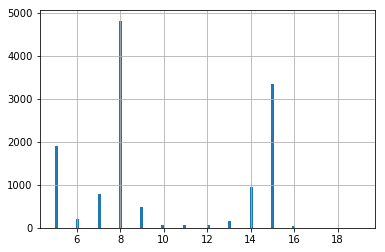

In [16]:
submittion['unidades_pred'].hist(bins=100)
pass

In [17]:
submittion[['id_pos','unidades_pred']].to_csv('../data/submissions/sub004.csv', sep=',', index=False, header=False)